# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns

In [1]:
from path_constants import H5AD
from nb_utils import describe

from celltype_utils import get_shared_adata
from path_constants import sig_outdir_base

ModuleNotFoundError: No module named 'path_utils'

## Read one2one h5ad

In [4]:
adata_shared = get_shared_adata()

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


# Read parquet files

## File paths

In [5]:
sketch_id = 'alphabet-dayhoff__ksize-51__scaled-10'


['/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse--to-publish/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/4--test-lemur/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet']

## Read aggregated hash2kmer with predicted cells

In [13]:
hash2kmer_with_predictions.read_parquet(
    os.path.join(sig_outdir_base, f"aggregated-hash2kmer-with-predicted-cells__{sketch_id}.parquet")
)

## Get number of aligned/unaligned k-mers in all cells

In [22]:
celltype_hashvals = hash2kmer.groupby(['species', 'groundtruth_celltype']).alignment_status.value_counts()
celltype_hashvals.head()

species  groundtruth_celltype        alignment_status
bat      Alveolar Epithelial Type 2  aligned             13522422
                                     unaligned             759922
         B cell                      aligned              1055558
                                     unaligned              58700
         Capillary                   aligned             14688263
Name: alignment_status, dtype: int64

In [24]:
celltype_hashval_percentage = celltype_hashvals.groupby(level=[0, 1]).apply(lambda x: 100 * x/x.sum())
celltype_hashval_percentage.name = 'percentage'
celltype_hashval_percentage = celltype_hashval_percentage.reset_index()
celltype_hashval_percentage

,species,groundtruth_celltype,alignment_status,percentage
0,bat,Alveolar Epithelial Type 2,aligned,94.679291
1,bat,Alveolar Epithelial Type 2,unaligned,5.320709
2,bat,B cell,aligned,94.731920
3,bat,B cell,unaligned,5.268080
4,bat,Capillary,aligned,95.639091
...,...,...,...,...
73,mouse,Natural Killer T cell,unaligned,3.501037
74,mouse,Smooth Muscle and Myofibroblast,aligned,97.046112
75,mouse,Smooth Muscle and Myofibroblast,unaligned,2.953888
76,mouse,T cell,aligned,96.752694


In [25]:
celltype_hashval_percentage_unaligned = celltype_hashval_percentage.query('alignment_status == "unaligned"')


In [26]:
order = celltype_hashval_percentage_unaligned.query('species == "bat"').sort_values(
    "percentage"
)["groundtruth_celltype"]
order

9                          Fibroblast
5                           Capillary
17    Smooth Muscle and Myofibroblast
11                         Macrophage
19                             T cell
13                           Monocyte
15              Natural Killer T cell
3                              B cell
1          Alveolar Epithelial Type 2
7                           Dendritic
Name: groundtruth_celltype, dtype: category
Categories (10, object): ['Alveolar Epithelial Type 2', 'B cell', 'Capillary', 'Dendritic', ..., 'Monocyte', 'Natural Killer T cell', 'Smooth Muscle and Myofibroblast', 'T cell']

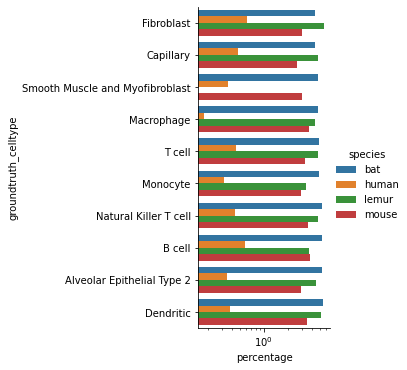

In [27]:
g = sns.catplot(
    data=celltype_hashval_percentage_unaligned,
    y="groundtruth_celltype",
    x="percentage",
    hue="species",
    kind="bar",
    order=order
)
g.set(xscale="log")

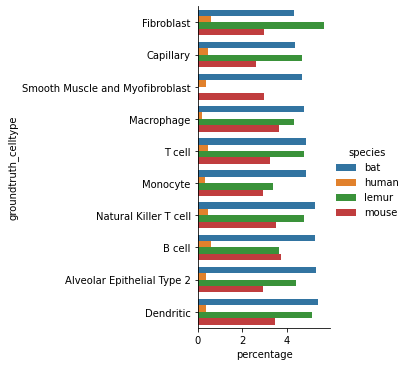

In [74]:
g = sns.catplot(
    data=celltype_hashval_percentage_unaligned,
    y="groundtruth_celltype",
    x="percentage",
    hue="species",
    kind="bar",
    order=order
)
# g.set(xscale="log")

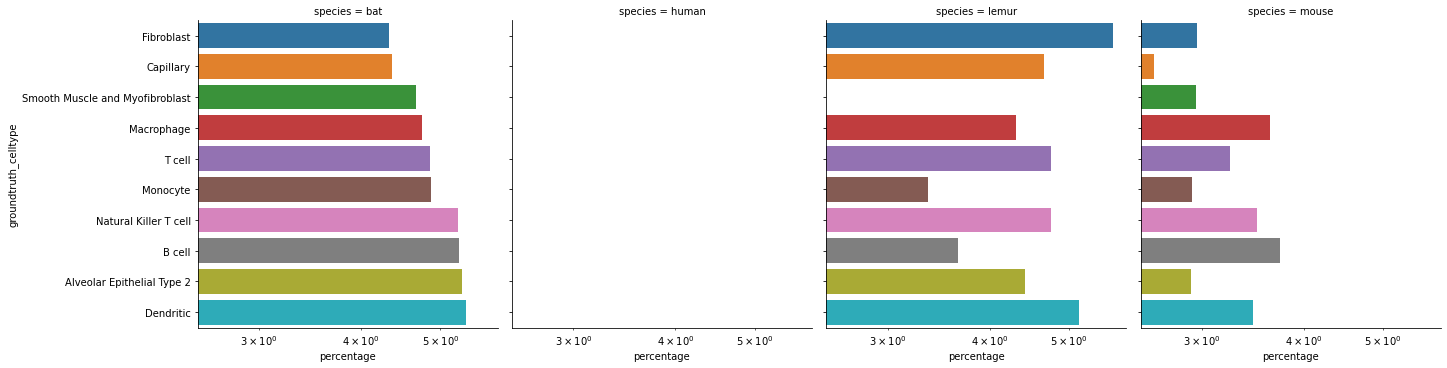

In [28]:
g = sns.catplot(
    data=celltype_hashval_percentage_unaligned,
    y="groundtruth_celltype",
    x="percentage",
    col="species",
    kind="bar",conn
    order=order
)
g.set(xscale="log")

## Read mouse diagnostic k-mer csvs

In [29]:
mouse_dir = '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/'
celltype_kmer_subdir = '5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent'

mouse_celltype_kmer_csvs = glob.glob(os.path.join(mouse_dir, celltype_kmer_subdir, sketch_id, 'csvs', '*csv'))
mouse_celltype_kmer_csvs

['/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/natural_killer_t_cell.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/alveolar_epithelial_type_2.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/smooth_muscle_and_myofibroblast.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/monocyte.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-si

In [30]:
%%time

dfs = []

for csv in mouse_celltype_kmer_csvs:
    basename = os.path.basename(csv)
    print('\ncelltype file:', )
    %time df = pd.read_csv(csv)
    df['celltype'] = basename.split('.')[0]
    dfs.append(df)
mouse_celltype_kmers = pd.concat(dfs)
describe(mouse_celltype_kmers)


celltype file:
CPU times: user 5.45 s, sys: 2.28 s, total: 7.73 s
Wall time: 8.1 s

celltype file:
CPU times: user 1.33 s, sys: 160 ms, total: 1.49 s
Wall time: 1.9 s

celltype file:
CPU times: user 504 ms, sys: 54.7 ms, total: 559 ms
Wall time: 773 ms

celltype file:
CPU times: user 25.7 s, sys: 2.33 s, total: 28 s
Wall time: 33.4 s

celltype file:
CPU times: user 7.83 s, sys: 705 ms, total: 8.54 s
Wall time: 10.1 s

celltype file:
CPU times: user 3.51 s, sys: 321 ms, total: 3.83 s
Wall time: 4.71 s

celltype file:
CPU times: user 4.6 s, sys: 370 ms, total: 4.97 s
Wall time: 5.84 s

celltype file:
CPU times: user 9.49 s, sys: 1.02 s, total: 10.5 s
Wall time: 10.6 s

celltype file:
CPU times: user 2.03 s, sys: 175 ms, total: 2.21 s
Wall time: 2.21 s

celltype file:
CPU times: user 2.04 s, sys: 148 ms, total: 2.19 s
Wall time: 2.21 s
(22370943, 5)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,celltype
0,KLSSPRGGMKKKTTHFG,debbbdbbedddbbdfb,308103755003737144,A00111:73:H3YHNDMXX:2:1218:21983:15264\tCB:Z:A...,natural_killer_t_cell
1,LSSPRGGMKKKTTHFGE,ebbbdbbedddbbdfbc,177719887282804153,A00111:73:H3YHNDMXX:2:1218:21983:15264\tCB:Z:A...,natural_killer_t_cell
2,YTVGKRFKEANNFLRPF,fbebddfdcbccfedbf,1822116523473074621,A00111:73:H3YHNDMXX:1:2311:5367:19179\tCB:Z:AA...,natural_killer_t_cell
3,KFGIICMEDLIQDIYTI,dfbeeaecceeccefbe,115722640331910096,A00111:73:H3YHNDMXX:2:1175:17463:20556\tCB:Z:A...,natural_killer_t_cell
4,KFGIICMEDLIQEIYTV,dfbeeaecceeccefbe,115722640331910096,A00111:73:H3YHNDMXX:2:2229:8260:32111\tCB:Z:AA...,natural_killer_t_cell


CPU times: user 1min 20s, sys: 18.9 s, total: 1min 39s
Wall time: 1min 49s


# Gene orthology

## Assign figure folder

In [31]:
figure_folder = (
    "/home/olga/googledrive/ImmuneEvolution/figures/kmer_gene_orthology"
)
!mkdir -p $figure_folder

## Use 1:1 orthologs from Anndata of bat-Lemur-human-mouse

In [32]:
describe(adata_shared.var)

(10560, 9)
--- First 5 entries ---


,bat__gene_name,mouse_lemur__gene_name-bat,mouse__gene_name-bat,mouse_lemur__gene_name_x-hlm,mouse__gene_name_x-hlm,gene_ids-lemur-hlm,n_cells-mouse-hlm,mouse_lemur__gene_name_y-hlm,mouse__gene_name_y-hlm
human__gene_name,,,,,,,,,
SAMD11,SAMD11,SAMD11,Samd11,SAMD11,Samd11,gene2117,5381,SAMD11,Samd11
NOC2L,NOC2L,NOC2L,Noc2l,NOC2L,Noc2l,gene2116,48156,NOC2L,Noc2l
KLHL17,KLHL17,KLHL17,Klhl17,KLHL17,Klhl17,gene2115,11262,KLHL17,Klhl17
ISG15,ISG15,ISG15,Isg15,ISG15,Isg15,gene2111,74269,ISG15,Isg15
AGRN,AGRN,AGRN,Agrn,AGRN,Agrn,gene2110,23538,AGRN,Agrn


## Assign k-mer type based on alignment status and gene name

In [33]:
PER_SPECIES_ORTHOLOGOUS_GENES = {
    "bat": set(adata_shared.var["bat__gene_name"]),
    "lemur": set(adata_shared.var["mouse_lemur__gene_name_x-hlm"]),
    "human": set(adata_shared.var.index),
    "mouse": set(adata_shared.var["mouse__gene_name-bat"]),
}
for k, v in PER_SPECIES_ORTHOLOGOUS_GENES.items():
    print(k, len(v))

bat 10560
lemur 10560
human 10560
mouse 10560


In [34]:
%%time

def is_orthologous(query_gene, species, per_species_orthologous_genes=PER_SPECIES_ORTHOLOGOUS_GENES):
    orthologous_genes = per_species_orthologous_genes[species]
    return query_gene in orthologous_genes


def assign_kmer_category(row):
    if row.alignment_status == 'unaligned':
        return 'Not in reference genome'
    elif pd.isnull(row.gene_name):
        return 'In ref genome, not in a gene'
    elif is_orthologous(row.gene_name, row.species):
        return 'In ref genome, in a 1:1 orthologous gene'
    else:
        return 'In ref genome, not in a 1:1 orthologous gene'

hash2kmer['kmer_category'] = hash2kmer.apply(assign_kmer_category, axis=1)
hash2kmer.groupby(['species', 'kmer_category']).size()

CPU times: user 1h 36min 3s, sys: 4min 32s, total: 1h 40min 35s
Wall time: 1h 40min 38s


species  kmer_category                               
bat      In ref genome, in a 1:1 orthologous gene        12951997
         In ref genome, not in a 1:1 orthologous gene    11802122
         In ref genome, not in a gene                    41883743
         Not in reference genome                          3350575
human    In ref genome, in a 1:1 orthologous gene        17815886
         In ref genome, not in a 1:1 orthologous gene    13476922
         In ref genome, not in a gene                     1973137
         Not in reference genome                           100633
lemur    In ref genome, in a 1:1 orthologous gene          756876
         In ref genome, not in a 1:1 orthologous gene      594885
         In ref genome, not in a gene                      577493
         Not in reference genome                           100244
mouse    In ref genome, in a 1:1 orthologous gene        31465710
         In ref genome, not in a 1:1 orthologous gene    39177340
         In ref genome

In [35]:
hash2kmer_with_predictions = hash2kmer.join(celltype_predictions, on='cell_id')
describe(hash2kmer_with_predictions)

(190862509, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,CFPLRYGGKKKKNKKGK,afbedfbbddddcddbd,1049274497017264409,A00111:78:H3YHCDMXX:1:1131:31720:15123\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,NaN,NaN,NaN
1,GSSVLIAVRTPEPSPRR,bbbeeebedbbcbbbdd,869748735803144472,A00111:78:H3YHCDMXX:1:1176:19262:14810\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,NaN,NaN,NaN
2,SSVLIAVRTPEPSPRRH,bbeeebedbbcbbbddd,1784576325013871600,A00111:78:H3YHCDMXX:1:1176:19262:14810\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,NaN,NaN,NaN
3,REVQTKYILEGVIQLIQ,dcecbdfeecbeeceec,565750021167986172,A00111:78:H3YHCDMXX:1:1180:1561:11804\tCB:Z:TT...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,NaN,NaN,NaN
4,YILEGVIQLIQDRIGKD,feecbeeceeccdebdc,1093885956538373214,A00111:78:H3YHCDMXX:1:1180:1561:11804\tCB:Z:TT...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,NaN,NaN,NaN


In [36]:
kmer_categories = (
    "Not in reference genome",
    "In ref genome, not in a gene",
    "In ref genome, not in a 1:1 orthologous gene",
    "In ref genome, in a 1:1 orthologous gene",
)

In [37]:
hash2kmer_with_predictions['kmer_category'] = pd.Categorical(hash2kmer_with_predictions['kmer_category'], categories=kmer_categories, ordered=True)

## Write hash2kmer with predictions and orthology to parquet

In [38]:
hash2kmer_with_predictions['hashval'] = hash2kmer_with_predictions['hashval'].astype(str)

In [39]:
hash2kmer_with_predictions.to_parquet(
    os.path.join(sig_outdir_base, f"aggregated-hash2kmer-with-predicted-cells--{sketch_id}--with-orthology.parquet")
)

In [40]:
1+1

2

## Get number of k-mers in different categories per `groundtruth_celltype`

In [41]:
%%time

celltype_col = "groundtruth_celltype"

diagnostic_kmers_n_per_category = hash2kmer_with_predictions.groupby(
    ["species", celltype_col, "kmer_category"]
).hashval.nunique()
diagnostic_kmers_n_per_category.name = "percent_kmers"
diagnostic_kmers_n_per_category

CPU times: user 2min 55s, sys: 34.3 s, total: 3min 30s
Wall time: 3min 22s


species  groundtruth_celltype             kmer_category                               
bat      Alveolar Epithelial Type 2       Not in reference genome                          391623
                                          In ref genome, not in a gene                    1865345
                                          In ref genome, not in a 1:1 orthologous gene     584145
                                          In ref genome, in a 1:1 orthologous gene         689674
         B cell                           Not in reference genome                           39302
                                                                                           ...   
mouse    Smooth Muscle and Myofibroblast  In ref genome, in a 1:1 orthologous gene          48120
         T cell                           Not in reference genome                           97250
                                          In ref genome, not in a gene                     294772
                               

In [42]:
diagnostic_kmers_n_per_category_df = diagnostic_kmers_n_per_category.groupby(level=[0, 1]).apply(lambda x: 100*x/x.sum()).reset_index()
diagnostic_kmers_n_per_category_df

,species,groundtruth_celltype,kmer_category,percent_kmers
0,bat,Alveolar Epithelial Type 2,Not in reference genome,11.091663
1,bat,Alveolar Epithelial Type 2,"In ref genome, not in a gene",52.830856
2,bat,Alveolar Epithelial Type 2,"In ref genome, not in a 1:1 orthologous gene",16.544329
3,bat,Alveolar Epithelial Type 2,"In ref genome, in a 1:1 orthologous gene",19.533152
4,bat,B cell,Not in reference genome,7.596072
...,...,...,...,...
155,mouse,Smooth Muscle and Myofibroblast,"In ref genome, in a 1:1 orthologous gene",42.646720
156,mouse,T cell,Not in reference genome,7.318165
157,mouse,T cell,"In ref genome, not in a gene",22.181904
158,mouse,T cell,"In ref genome, not in a 1:1 orthologous gene",40.089775


### Write to file!!


In [2]:
diagnostic_kmers_n_per_category_df.to_parquet(
    os.path.join(
        sig_outdir_base,
        f"n-kmers-per-orthology-category-per-celltye-per-species.parquet",
    )
)

NameError: name 'diagnostic_kmers_n_per_category_df' is not defined

In [43]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
152,mouse,Smooth Muscle and Myofibroblast,Not in reference genome,4.056401
120,mouse,Alveolar Epithelial Type 2,Not in reference genome,4.611873
136,mouse,Fibroblast,Not in reference genome,5.783846
148,mouse,Natural Killer T cell,Not in reference genome,6.092583
132,mouse,Dendritic,Not in reference genome,6.581250
128,mouse,Capillary,Not in reference genome,6.754631
156,mouse,T cell,Not in reference genome,7.318165
140,mouse,Macrophage,Not in reference genome,7.374086
124,mouse,B cell,Not in reference genome,8.734350
144,mouse,Monocyte,Not in reference genome,8.951451


In [44]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
152,mouse,Smooth Muscle and Myofibroblast,Not in reference genome,4.056401
120,mouse,Alveolar Epithelial Type 2,Not in reference genome,4.611873
136,mouse,Fibroblast,Not in reference genome,5.783846
148,mouse,Natural Killer T cell,Not in reference genome,6.092583
132,mouse,Dendritic,Not in reference genome,6.581250
128,mouse,Capillary,Not in reference genome,6.754631
156,mouse,T cell,Not in reference genome,7.318165
140,mouse,Macrophage,Not in reference genome,7.374086
124,mouse,B cell,Not in reference genome,8.734350
144,mouse,Monocyte,Not in reference genome,8.951451


In [45]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "lemur") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
104,lemur,Monocyte,Not in reference genome,3.405447
84,lemur,B cell,Not in reference genome,3.751750
100,lemur,Macrophage,Not in reference genome,4.369957
80,lemur,Alveolar Epithelial Type 2,Not in reference genome,4.455482
88,lemur,Capillary,Not in reference genome,4.700067
116,lemur,T cell,Not in reference genome,4.749934
108,lemur,Natural Killer T cell,Not in reference genome,4.772745
92,lemur,Dendritic,Not in reference genome,5.314372
96,lemur,Fibroblast,Not in reference genome,5.755118
112,lemur,Smooth Muscle and Myofibroblast,Not in reference genome,NaN


# Plot percentage of kmers in ref genome, etc

In [46]:
figure_folder = '/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology'
! mkdir $figure_folder

mkdir: cannot create directory ‘/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology’: File exists


In [47]:
species_order = 'human', 'lemur', 'mouse', 'bat'
diagnostic_kmers_n_per_category_df['species'] = pd.Categorical(diagnostic_kmers_n_per_category_df['species'], categories=species_order, ordered=True)

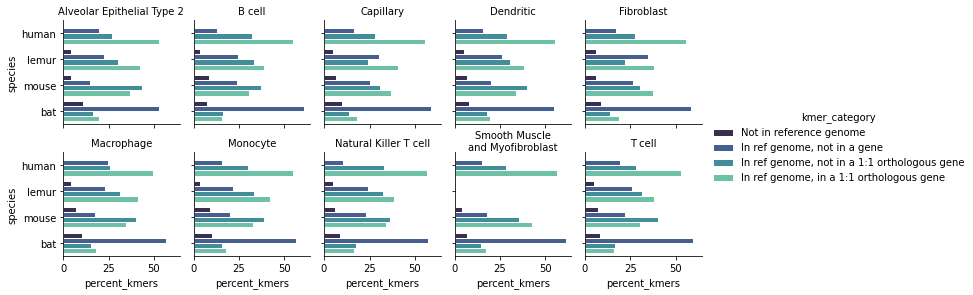

In [48]:
g = sns.catplot(
    data=diagnostic_kmers_n_per_category_df,
    col=celltype_col,
    order=species_order,
    col_wrap=5,
    y="species",
    x="percent_kmers",
    hue="kmer_category",
    hue_order=kmer_categories,
    palette='mako',
    kind='bar',
    height=2,
    linewidth=1,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    if title == 'Smooth Muscle and Myofibroblast':
        ax.set_title('Smooth Muscle\nand Myofibroblast', fontsize=10, pad=-20)
pdf = os.path.join(figure_folder, 'unstacked_barplot__col-celltype__y-species__hue-kmer_category.pdf')
g.savefig(pdf)

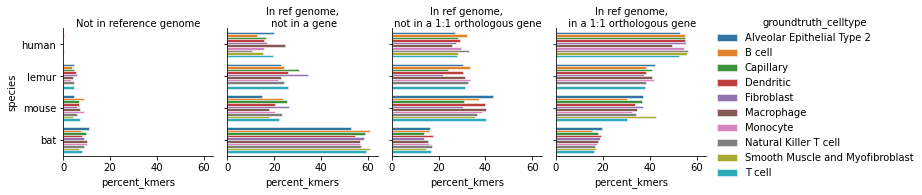

In [49]:
g = sns.catplot(
    data=diagnostic_kmers_n_per_category_df,
    hue=celltype_col,
#     col_wrap=2,
    y="species",
    order=species_order,
    x="percent_kmers",
    col="kmer_category",
    col_order=kmer_categories,
    palette='tab10',
    kind='bar',
    height=2.5,
    sharex=True,
        linewidth=.5,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    if ax.is_last_row():
        title = ax.get_title()
        title = title.replace(',', ',\n')
        ax.set_title(title, fontsize=10, pad=-20)
#     if ax.is_first_col():
#         ax.set(xscale='log')
pdf = os.path.join(figure_folder, 'unstacked_barplot__col-kmer_category__y-species__hue-celltype.pdf')
g.savefig(pdf)

In [50]:
species_order_no_lemur = ['human','mouse', 'bat']

In [51]:
diagnostic_kmers_n_per_category_df_no_lemur = diagnostic_kmers_n_per_category_df.query(
    "species in @species_order_no_lemur"
)
diagnostic_kmers_n_per_category_df_no_lemur.species = pd.Categorical(
    diagnostic_kmers_n_per_category_df_no_lemur.species,
    categories=species_order_no_lemur,
    ordered=True,
)
describe(diagnostic_kmers_n_per_category_df_no_lemur)

(120, 4)
--- First 5 entries ---


/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,species,groundtruth_celltype,kmer_category,percent_kmers
0,bat,Alveolar Epithelial Type 2,Not in reference genome,11.091663
1,bat,Alveolar Epithelial Type 2,"In ref genome, not in a gene",52.830856
2,bat,Alveolar Epithelial Type 2,"In ref genome, not in a 1:1 orthologous gene",16.544329
3,bat,Alveolar Epithelial Type 2,"In ref genome, in a 1:1 orthologous gene",19.533152
4,bat,B cell,Not in reference genome,7.596072


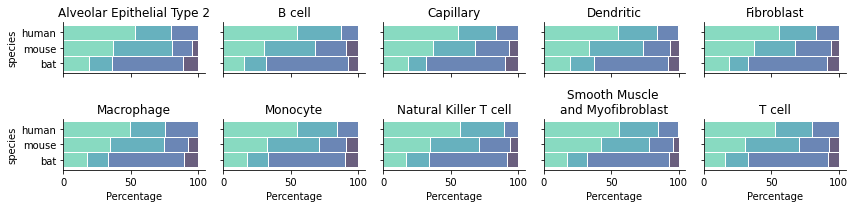

In [52]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 3), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
#         yticks=species_order,
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, 'stacked_barplot__col-celtype__y-species__hue-kmer_category.pdf')
fig.savefig(pdf)

In [53]:
figure_folder

'/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology'

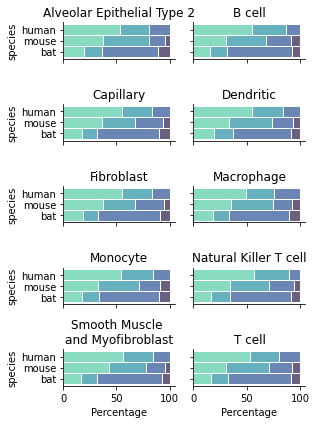

In [54]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(4.5, 6), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, 'stacked_barplot__col-celtype__y-species__hue-kmer_category__two_column.pdf')
fig.savefig(pdf)

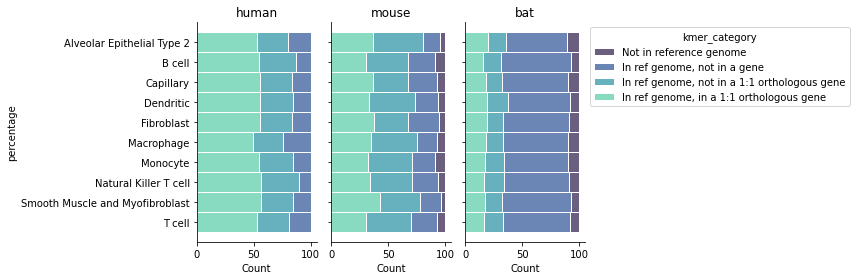

In [55]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)


for (species, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby("species"), axes.flat
):
    legend = ax.is_last_col()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y=celltype_col,
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=legend,
        ax=ax,
    )
    ax.set(
        ylabel="percentage",
        title=species,
#         yticks=["bat", "human"],
    )
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

sns.despine()
fig.tight_layout()

pdf = os.path.join(figure_folder, 'stacked_barplot__col-species__y-celltype__hue-kmer_category.pdf')
fig.savefig(pdf)

In [56]:
1+1

2

## Get number of k-mers in different categories per `predicted_compartment`

In [57]:
%%time

celltype_col = "predicted_compartment"

compartment_kmers_n_per_category = hash2kmer_with_predictions.groupby(
    ["species", celltype_col, "kmer_category"]
).hashval.nunique()
compartment_kmers_n_per_category.name = "percent_kmers"
compartment_kmers_n_per_category

CPU times: user 2min 40s, sys: 12.7 s, total: 2min 53s
Wall time: 2min 53s


species  predicted_compartment  kmer_category                               
bat      endothelial            Not in reference genome                          366295
                                In ref genome, not in a gene                    2186950
                                In ref genome, not in a 1:1 orthologous gene     516277
                                In ref genome, in a 1:1 orthologous gene         675764
         epithelial             Not in reference genome                          395629
                                                                                 ...   
mouse    myeloid                In ref genome, in a 1:1 orthologous gene         340132
         stromal                Not in reference genome                           22927
                                In ref genome, not in a gene                      98990
                                In ref genome, not in a 1:1 orthologous gene     113260
                                In ref geno

In [58]:
compartment_kmers_n_per_category_df = compartment_kmers_n_per_category.groupby(level=[0, 1]).apply(lambda x: 100*x/x.sum()).reset_index()
compartment_kmers_n_per_category_df

,species,predicted_compartment,kmer_category,percent_kmers
0,bat,endothelial,Not in reference genome,9.780161
1,bat,endothelial,"In ref genome, not in a gene",58.392069
2,bat,endothelial,"In ref genome, not in a 1:1 orthologous gene",13.784715
3,bat,endothelial,"In ref genome, in a 1:1 orthologous gene",18.043055
4,bat,epithelial,Not in reference genome,11.116631
...,...,...,...,...
75,mouse,myeloid,"In ref genome, in a 1:1 orthologous gene",34.171002
76,mouse,stromal,Not in reference genome,5.887746
77,mouse,stromal,"In ref genome, not in a gene",25.421030
78,mouse,stromal,"In ref genome, not in a 1:1 orthologous gene",29.085624


In [59]:
compartment_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,predicted_compartment,kmer_category,percent_kmers
64,mouse,epithelial,Not in reference genome,4.852021
76,mouse,stromal,Not in reference genome,5.887746
60,mouse,endothelial,Not in reference genome,6.047539
68,mouse,lymphoid,Not in reference genome,8.072272
72,mouse,myeloid,Not in reference genome,8.555007


In [60]:
compartment_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,predicted_compartment,kmer_category,percent_kmers
64,mouse,epithelial,Not in reference genome,4.852021
76,mouse,stromal,Not in reference genome,5.887746
60,mouse,endothelial,Not in reference genome,6.047539
68,mouse,lymphoid,Not in reference genome,8.072272
72,mouse,myeloid,Not in reference genome,8.555007


In [61]:
compartment_kmers_n_per_category_df.query(
    '(species == "lemur") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,predicted_compartment,kmer_category,percent_kmers
44,lemur,epithelial,Not in reference genome,4.599100
40,lemur,endothelial,Not in reference genome,4.755519
48,lemur,lymphoid,Not in reference genome,5.437922
56,lemur,stromal,Not in reference genome,5.818714
52,lemur,myeloid,Not in reference genome,5.860263


# Plot percentage of kmers in ref genome, etc

In [62]:
figure_folder = '/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology'
! mkdir $figure_folder

mkdir: cannot create directory ‘/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology’: File exists


In [63]:
species_order = 'human', 'lemur', 'mouse', 'bat'
compartment_kmers_n_per_category_df['species'] = pd.Categorical(compartment_kmers_n_per_category_df ['species'], categories=species_order, ordered=True)

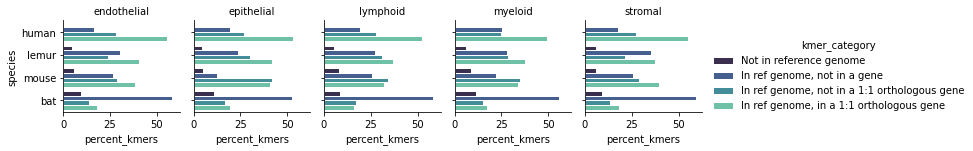

In [64]:
g = sns.catplot(
    data=compartment_kmers_n_per_category_df,
    col=celltype_col,
    order=species_order,
    col_wrap=5,
    y="species",
    x="percent_kmers",
    hue="kmer_category",
    hue_order=kmer_categories,
    palette='mako',
    kind='bar',
    height=2,
    linewidth=1,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    if title == 'Smooth Muscle and Myofibroblast':
        ax.set_title('Smooth Muscle\nand Myofibroblast', fontsize=10, pad=-20)
pdf = os.path.join(figure_folder, f'unstacked_barplot__col-celltype__y-species__hue-kmer_category__{celltype_col}.pdf')
g.savefig(pdf)

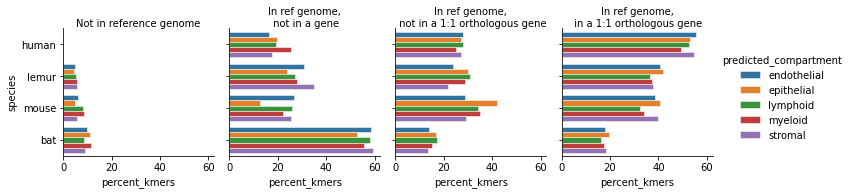

In [65]:
g = sns.catplot(
    data=compartment_kmers_n_per_category_df,
    hue=celltype_col,
#     col_wrap=2,
    y="species",
    order=species_order,
    x="percent_kmers",
    col="kmer_category",
    col_order=kmer_categories,
    palette='tab10',
    kind='bar',
    height=2.5,
    sharex=True,
        linewidth=.5,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    if ax.is_last_row():
        title = ax.get_title()
        title = title.replace(',', ',\n')
        ax.set_title(title, fontsize=10, pad=-20)
#     if ax.is_first_col():
#         ax.set(xscale='log')
pdf = os.path.join(figure_folder, f'unstacked_barplot__col-kmer_category__y-species__hue-celltype__{celltype_col}.pdf')
g.savefig(pdf)

In [66]:
species_order_no_lemur = ['human','mouse', 'bat']

In [67]:
compartment_kmers_n_per_category_df_no_lemur = compartment_kmers_n_per_category_df.query(
    "species in @species_order_no_lemur"
)
compartment_kmers_n_per_category_df_no_lemur.species = pd.Categorical(
    compartment_kmers_n_per_category_df_no_lemur.species,
    categories=species_order_no_lemur,
    ordered=True,
)
describe(compartment_kmers_n_per_category_df_no_lemur)

(60, 4)
--- First 5 entries ---


/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,species,predicted_compartment,kmer_category,percent_kmers
0,bat,endothelial,Not in reference genome,9.780161
1,bat,endothelial,"In ref genome, not in a gene",58.392069
2,bat,endothelial,"In ref genome, not in a 1:1 orthologous gene",13.784715
3,bat,endothelial,"In ref genome, in a 1:1 orthologous gene",18.043055
4,bat,epithelial,Not in reference genome,11.116631


In [68]:
compartment_kmers_n_per_category_df_no_lemur.query('kmer_category == "Not in reference genome"')

,species,predicted_compartment,kmer_category,percent_kmers
0,bat,endothelial,Not in reference genome,9.780161
4,bat,epithelial,Not in reference genome,11.116631
8,bat,lymphoid,Not in reference genome,8.757574
12,bat,myeloid,Not in reference genome,11.507867
16,bat,stromal,Not in reference genome,8.944639
20,human,endothelial,Not in reference genome,0.138276
24,human,epithelial,Not in reference genome,0.116504
28,human,lymphoid,Not in reference genome,0.122846
32,human,myeloid,Not in reference genome,0.093800
36,human,stromal,Not in reference genome,0.120226


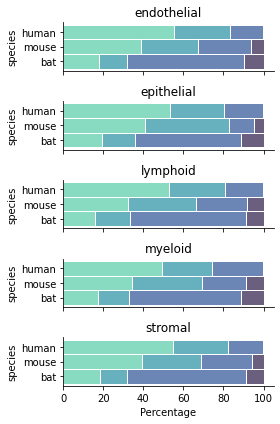

In [71]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(4, 6), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    compartment_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, f'stacked_barplot__col-celtype__y-species__hue-kmer_category__two_column__{celltype_col}.pdf')
fig.savefig(pdf)

In [72]:
pdf

'/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology/stacked_barplot__col-celtype__y-species__hue-kmer_category__two_column__predicted_compartment.pdf'